In [64]:
import numpy as np

from scipy.stats import norm
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm

import time
from scipy.ndimage.interpolation import shift
import scipy.stats
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
from delta_hedging import delta_hedging

import matplotlib.pyplot as plt
import pandas as pd

### 현재가 50,000원 $K$ = 55,000원  수량# 100,000 계약
### OPT 매도 포지션일때 내재 변동성 45%로 마진을 쌓아 놓고 Hedging PNL을 계산한다
### Int cost=4% daily calculation
### Transaction Cost= 0.1% at selling

In [20]:
inputs = {
    's0' : 50000,
    'k' : 55000,
    'rf' : 0.04,
    'sigma' : 0.4,
    'imvol' : 0.4,
    'T' : 1,
    'mu' : 0.04,
    'q' : 0,
    'interval' : 1/260,
    'time_step' : 130,
    'simul_num' : 10000,
    'num_shares' : 100000
}
dh = delta_hedging(inputs)

In [21]:
dh.bs_call('c')

4092.0174385438695

In [23]:
path = dh.stock_path()

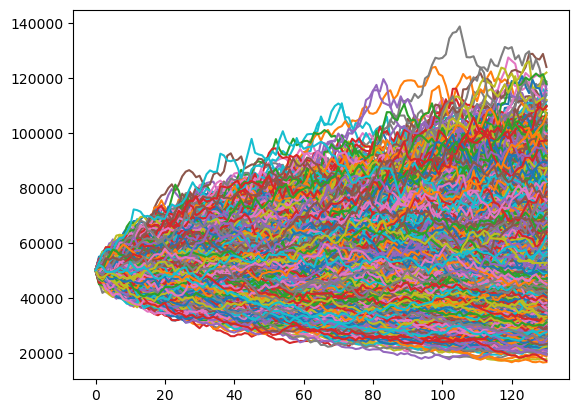

In [28]:
plt.plot(path)
plt.show()

In [34]:
dh.k

55000

In [46]:
path[:]

(131, 10000)

In [78]:
itm_path.shape[1]

3479

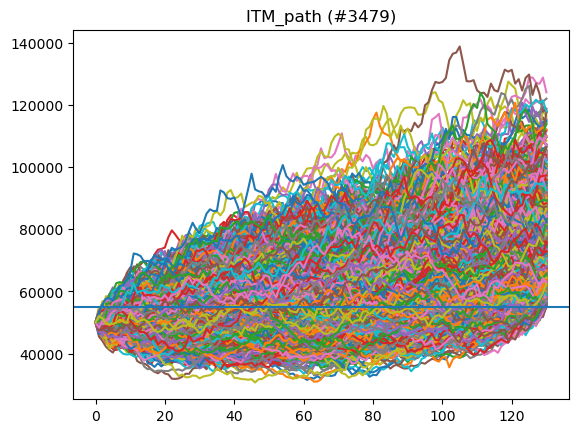

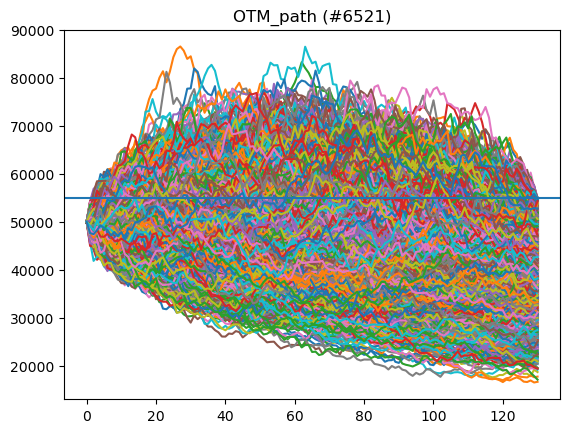

In [79]:
'''OTM, ITM, ATM Path 나누기 '''
itm_path = path[:, np.where(path[-1,:] > dh.k)[0]]
atm_path = path[:, np.where(path[-1,:] == dh.k)[0]]
otm_path = path[:, np.where(path[-1,:] < dh.k)[0]]


plt.title(f'ITM_path (#{itm_path.shape[1]})')
plt.plot(itm_path)
plt.axhline(dh.k)
plt.show()

if atm_path.size != 0:
    plt.plot(atm_path)
    plt.axhline(dh.k)
    plt.show()
else:
    pass

plt.title(f'OTM_path (#{otm_path.shape[1]})')
plt.plot(otm_path)
plt.axhline(dh.k)
plt.show()

In [89]:
itm_path[itm_path[:,0].argmin(),0]

49759.59318220084

In [101]:
itm_path.argmin(axis=0)

array([14, 57, 53, ...,  1, 39, 30])

In [105]:
itm_path[:,:2]

array([[50000.        , 50000.        ],
       [50432.82536322, 50311.87934636],
       [50159.23982463, 49094.8623775 ],
       [51868.36162406, 48357.26037684],
       [53678.31697898, 47055.40368392],
       [51563.37939709, 46151.24810504],
       [50848.12607579, 46582.62557633],
       [53082.10140209, 47856.11700386],
       [51016.90309679, 49464.91184098],
       [51580.5425489 , 47698.31943865],
       [52806.94873633, 46100.05155373],
       [52185.90230326, 45838.15349425],
       [51810.99265367, 46984.62195849],
       [52096.41362594, 48058.83983091],
       [49759.5931822 , 47398.01434574],
       [51996.42693648, 46580.91223638],
       [51962.04130402, 48716.04738594],
       [51843.9448047 , 49595.98973582],
       [52164.33344312, 49920.7403307 ],
       [54270.73971482, 52935.58870098],
       [53298.5567179 , 52065.47426669],
       [54007.99704364, 52477.27978617],
       [54475.0666696 , 52596.02364138],
       [55856.40686133, 51587.89647812],
       [55296.55

In [85]:
np.argmin(itm_path,axis=1)

array([   0, 2865, 2865, 2865, 2865, 2865,  753, 2149, 2149, 2149,  502,
       2149, 2045, 2045, 2837, 2837, 2045, 2045, 2045, 2045, 2045, 2045,
       2045, 2045, 2045, 2045, 3338, 3338, 3338, 3338, 3338, 3338, 3338,
       3338, 3338, 2903, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338,
       3338, 3338, 3338, 3338, 3338, 3338, 3338, 3338, 2667,  651,  651,
        651,  651,  651, 3338,  651,  651,   10,  651,  651,  651,  651,
         10, 3338,   10,   10, 2667, 3338, 3338, 3338, 3338, 3338, 3338,
       3338, 1369,   10,   10,   10,   10, 1369, 1369,  525,  525, 2955,
        525,  525,  525, 1369, 1369, 1369,  525,  525,  525,  525, 2211,
       2211,  270,  270, 2211, 2211, 2211,  642,   87,   87,   87,   87,
         87,   87, 3026, 3026, 3026, 3026, 3026, 3026, 2576,  869, 3026,
       3445, 3026, 3046,  869,  869,  869, 1566, 1095, 1474, 1635])

In [81]:
itm_path_always_over  = itm_path[:, np.where(itm_path > dh.k)[0]]
otm_path_always_under = otm_path[:, np.where(otm_path < dh.k)[0]]
itm_path_always_over.shape

(131, 261783)